In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# set plotting style
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['font.size'] = 9

In [5]:
# import dataset
df = pd.read_csv('../data/TSLA_All.csv')
df.fillna(0, inplace=True)

df.sample(5)

,Unnamed: 0,date,close,high,low,open,volume,year,quarter,month,...,sma_7,sma_7_up,sma_7_low,rsi,k,d,wr,cci,ppo,sentiment_score
690,690,2021-11-22,341.010010,353.829987,340.510010,349.049988,2.711680e+07,2021,4,11,...,342.148568,346.530088,337.767049,53.386408,54.731683,60.046782,-45.268317,46.130261,0.818396,0.999
1319,1319,2023-08-13,304.673340,305.713328,298.953328,301.510010,1.508387e+07,2023,3,8,...,307.088575,317.946877,296.230273,47.277470,21.417909,13.257893,-78.582091,-92.114051,0.238596,0.992
137,137,2020-05-18,213.190002,214.639999,210.940002,212.149994,2.015190e+07,2020,2,5,...,210.021432,216.005984,204.036880,68.213296,85.675141,82.129832,-14.324859,68.277020,3.346256,0.983
1459,1459,2023-12-31,350.125000,356.580002,345.915009,355.154999,1.701135e+07,2023,4,12,...,354.511066,360.356963,348.665169,57.988826,52.672863,62.762947,-47.327137,-40.417875,1.711502,0.840
538,538,2021-06-23,340.589996,343.420013,338.200012,339.350006,1.481780e+07,2021,2,6,...,334.290004,343.041593,325.538415,63.203404,82.054448,70.872249,-17.945552,160.184317,0.880396,0.844


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.fillna(0, inplace=True)

In [7]:
df.shape

(1673, 46)

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
df.head()

,date,close,high,low,open,volume,year,quarter,month,day,...,sma_7,sma_7_up,sma_7_low,rsi,k,d,wr,cci,ppo,sentiment_score
0,2020-01-02,209.779999,209.789993,206.270004,206.750000,1.207710e+07,2020,1,1,2,...,209.779999,210.794776,207.655221,76.380818,92.364923,94.661666,-7.635077,77.658178,0.000000,0.869
1,2020-01-03,208.669998,210.399994,206.949997,207.210007,1.118840e+07,2020,1,1,3,...,209.224998,210.794776,207.655221,76.380818,92.364923,94.661666,-7.635077,77.658178,-0.042226,0.869
2,2020-01-04,209.980001,211.193329,206.806666,207.040003,1.314523e+07,2020,1,1,4,...,209.476666,210.888098,208.065234,76.380818,92.364923,94.661666,-7.635077,77.658178,-0.024991,0.000
3,2020-01-05,211.290003,211.986664,206.663335,206.870000,1.510207e+07,2020,1,1,5,...,209.930000,212.078555,207.781446,76.380818,92.364923,94.661666,-7.635077,77.658178,0.038602,0.000
4,2020-01-06,212.600006,212.779999,206.520004,206.699997,1.705890e+07,2020,1,1,6,...,210.464001,213.491436,207.436567,76.380818,92.364923,94.661666,-7.635077,77.658178,0.137642,0.000


In [25]:
df.shape

(1673, 45)

### Kiểm tra tham số d

In [26]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    result = adfuller(df)
    print("ADF Statistic: %f" % result[0])
    print("p-value: %f" % result[1])
    if result[1] <= 0.05:
        print("Chuỗi dữ liệu có tính dừng (bác bỏ giả thuyết gốc).")
    else:
        print("Chuỗi dữ liệu không có tính dừng (không bác bỏ giả thuyết gốc).")

In [27]:
check_stationarity(df['close'])

ADF Statistic: -0.485775
p-value: 0.894763
Chuỗi dữ liệu không có tính dừng (không bác bỏ giả thuyết gốc).


-  p-value =0.894763 lớn hơn 0.05, chúng ta không bác bỏ giả thuyết gốc (null hypothesis)
- dữ liệu có xu hướng thay đổi theo thời gian và không quay về giá trị trung bình cố định.

In [28]:
decompose = seasonal_decompose(df['close'], model = 'additive', period=252)

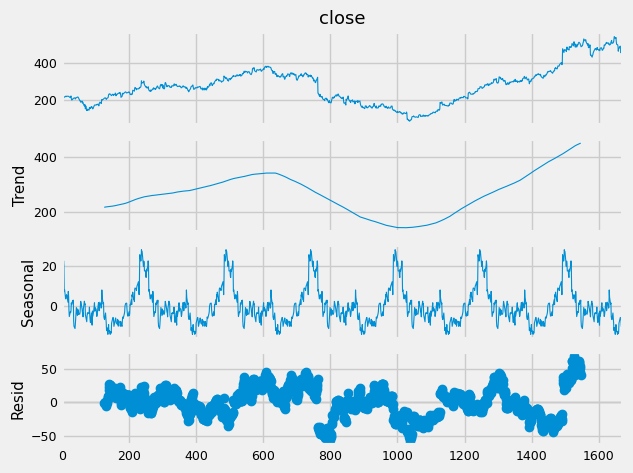

In [29]:
decompose.plot();

- Biểu đồ phụ phía trên hiển thị chuỗi thời gian ban đầu, biểu diễn giá close ngày theo thời gian.
- Biểu đồ phụ thứ hai hiển thị thành phần xu hướng được trích xuất từ ​​chuỗi gốc. Xu hướng thể hiện chuyển động hoặc mô hình dài hạn trong dữ liệu, làm mịn các biến động ngắn hạn giúp xác định hướng chung của chuỗi thời gian.
- Biểu đồ phụ thứ ba thể hiện thành phần theo mùa, ghi lại các mô hình hoặc chu kỳ lặp lại trong dữ liệu xảy ra theo các khoảng thời gian đều đặn, cho biết tính theo mùa hàng tháng, giúp hiểu được những biến động thường xuyên xảy ra vào những thời điểm cụ thể trong năm.
- Biểu đồ phụ bên dưới hiển thị phần dư hoặc phần còn lại sau khi loại bỏ xu hướng và thành phần theo mùa.

In [30]:
check_stationarity(df['close'].diff().dropna())

ADF Statistic: -29.831742
p-value: 0.000000
Chuỗi dữ liệu có tính dừng (bác bỏ giả thuyết gốc).


 - Chúng ta trọn d = 1 vì giả thuyết của nó đã có tính dừng với p-value < 0.05 (mức ý nghĩa)
 - Với d = 2 giả thuyết của nó vẫn đúng tuy nhiên như vậy thì sẻ làm mất dữ liệu ngoài ra nếu d quá cao có thể loại bỏ đi xu hướng và làm cho dữ liệu khó diễn giải hơn

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

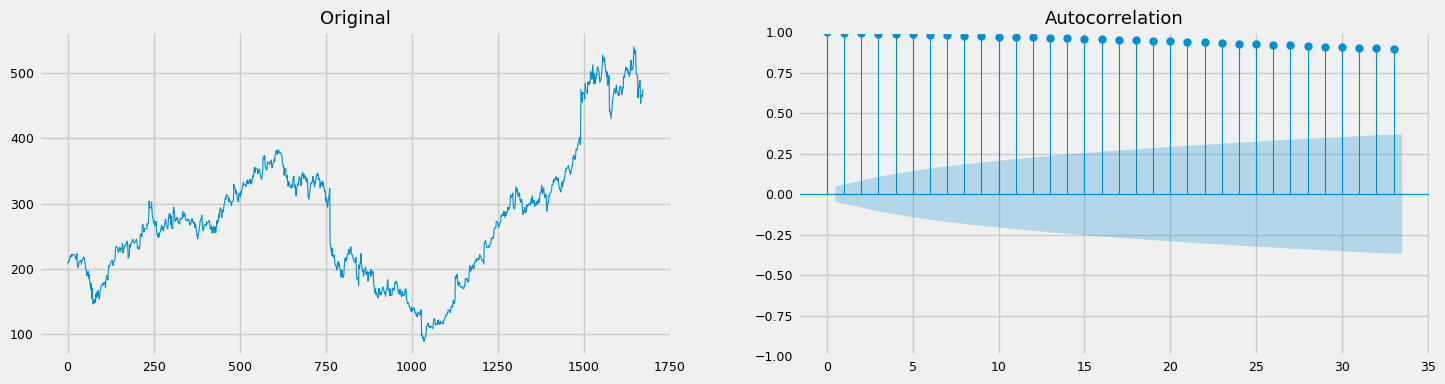

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(df['close'])
ax1.set_title('Original')

plot_acf(df['close'], ax=ax2);

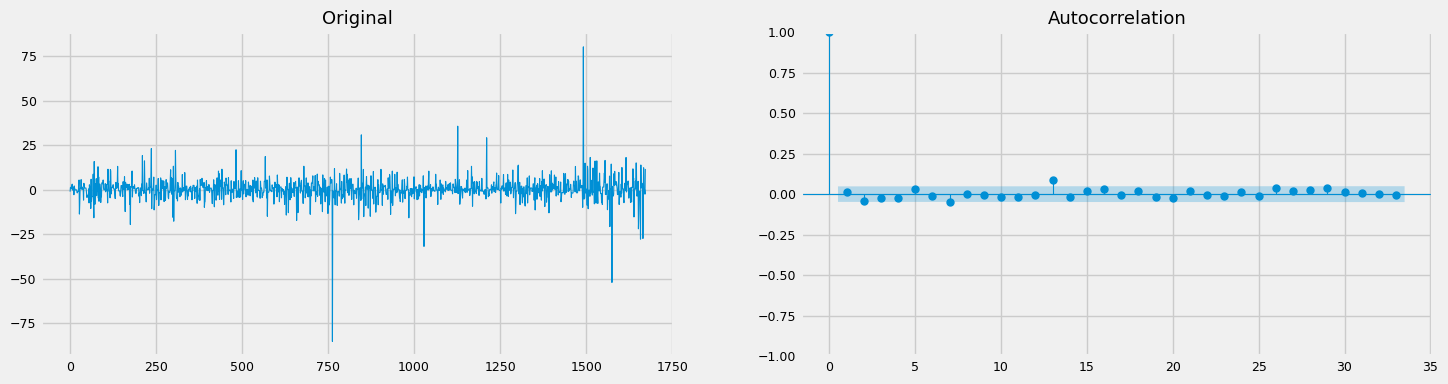

In [32]:
diff = df.close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('Original')

plot_acf(diff, ax=ax2);

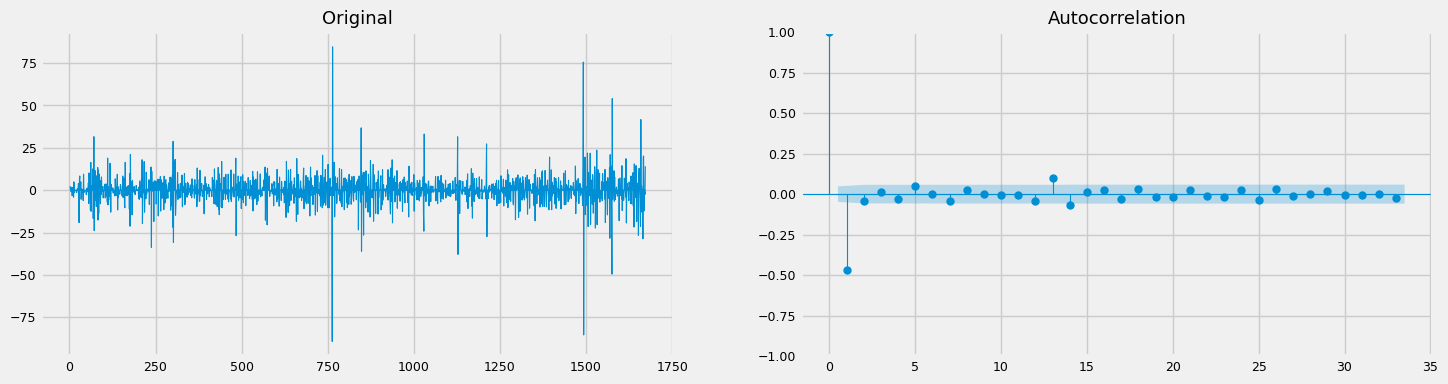

In [33]:
diff = df.close.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('Original')

plot_acf(diff, ax=ax2);

### Kiểm tra tham số p

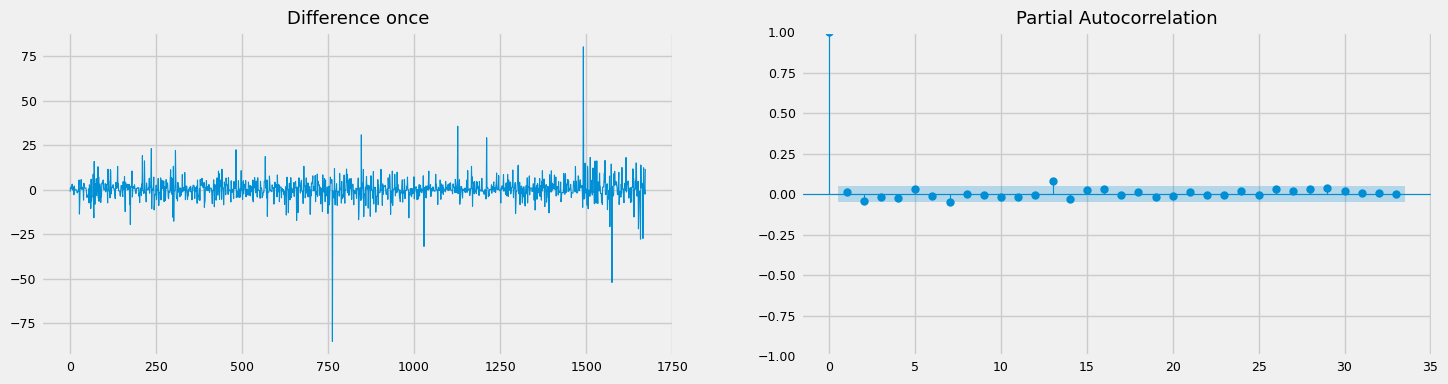

In [34]:
diff = df['close'].diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

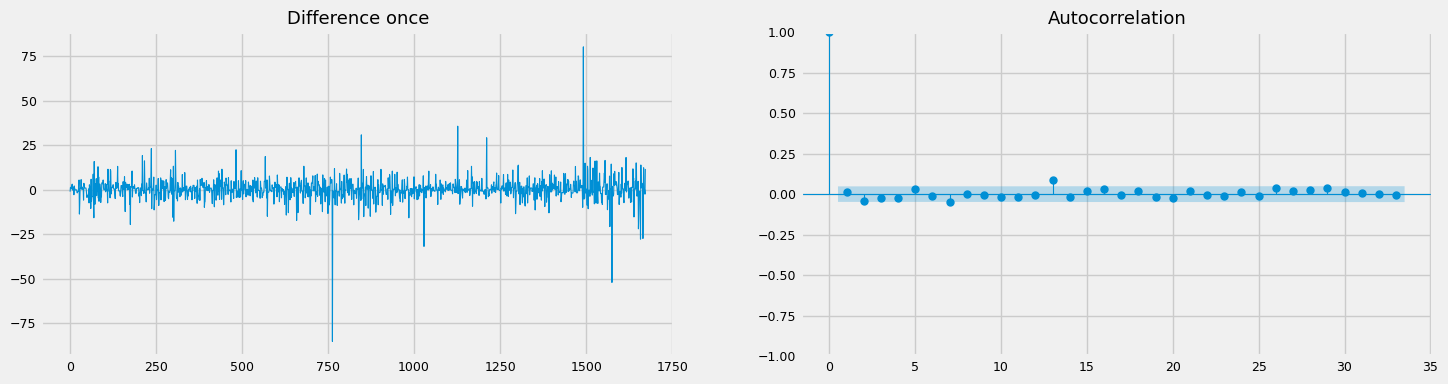

In [35]:
diff = df['close'].diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title('Difference once')
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);